## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Understand the Problem</div>

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Objective</div>

<p style="font-size: 16px; font-family: Arial, sans-serif;">The aim of this project is to develop a Convolutional Neural Network (CNN) model that classifies human activities from images. The model will be trained to recognize and label the activities from a set of 15 predefined categories based on the visual content present in the images.</p>

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Data Overview</div>

<p style="font-size: 16px; font-family: Arial, sans-serif;">The dataset consists of labeled images categorized into 15 distinct human activity classes. These actions represent common activities performed by humans. The classes are as follows:</p>

<ul style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>Calling</strong></li>
    <li><strong>Clapping</strong></li>
    <li><strong>Cycling</strong></li>
    <li><strong>Dancing</strong></li>
    <li><strong>Drinking</strong></li>
    <li><strong>Eating</strong></li>
    <li><strong>Fighting</strong></li>
    <li><strong>Hugging</strong></li>
    <li><strong>Laughing</strong></li>
    <li><strong>Listening to Music</strong></li>
    <li><strong>Running</strong></li>
    <li><strong>Sitting</strong></li>
    <li><strong>Sleeping</strong></li>
    <li><strong>Texting</strong></li>
    <li><strong>Using Laptop</strong></li>
</ul>

<p style="font-size: 16px; font-family: Arial, sans-serif;">Each class is represented by a folder containing images of that specific activity. The dataset includes over 12,000 labeled images, including both training and validation data.</p>

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Problem Statement</div>

<p style="font-size: 16px; font-family: Arial, sans-serif;">Human Action Recognition (HAR) is a crucial task in the field of computer vision aimed at understanding and interpreting human behaviors through images or videos. By identifying and classifying human actions, HAR enables several applications across various domains, such as:</p>

<ul style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>Security Systems</strong>: Monitoring and detecting suspicious behavior.</li>
    <li><strong>Healthcare</strong>: Tracking physical activity and assisting in rehabilitation.</li>
    <li><strong>Entertainment</strong>: Gesture-based interactions in games and multimedia systems.</li>
</ul>

<p style="font-size: 16px; font-family: Arial, sans-serif;">The task involves using visual data captured in the form of images to recognize human activities. The project will focus on classifying these activities into one of 15 predefined classes based on the image content.</p>

<p style="font-size: 16px; font-family: Arial, sans-serif;">Human actions can be captured using different modalities, such as:</p>

<ul style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>RGB Images</strong>: Regular color images.</li>
    <li><strong>Skeleton Data</strong>: Joint and limb positions to understand body posture.</li>
    <li><strong>Depth and Infrared Images</strong>: Provide 3D and thermal perspectives of human actions.</li>
    <li><strong>Audio and Radar Signals</strong>: Alternative methods for activity recognition.</li>
</ul>

<p style="font-size: 16px; font-family: Arial, sans-serif;">This project specifically focuses on recognizing human activities from **RGB images** using a CNN-based image classification model.</p>

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Task Description</div>

<p style="font-size: 16px; font-family: Arial, sans-serif;">The task is divided into the following steps:</p>

<ul style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>Training</strong>: You will use the labeled images in the `train` folder to build and train a CNN model for classifying the human activities.</li>
    <li><strong>Prediction</strong>: After training, the model will predict the activity classes for the images in the `test` folder.</li>
    <li><strong>Submission</strong>: The predictions for the test images must be submitted in the format specified by the `Testing_set.csv` file, with the corresponding class label for each image.</li>
</ul>



## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Import Necessary Libraries</div>

<p style="font-size: 16px; font-family: Arial, sans-serif;">Here, I will remove warnings to show a clean notebooks and import all necessary at the beginning</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For handling file operations and directories
import os  # Provides functions for file and directory operations such as path manipulation, creating directories, etc.

# For numerical computations and handling image data as arrays
import numpy as np  # Fundamental package for numerical computing, used for creating and manipulating arrays (images, labels, etc.)

# For data manipulation and reading CSV files
import pandas as pd  # Provides high-level data structures like DataFrames, used for handling and analyzing data (e.g., reading CSV files)

# For image processing (loading, resizing, etc.)
import cv2  # OpenCV library for image processing (e.g., reading, resizing, and manipulating images)

# For data visualization (e.g., plotting images and model evaluation metrics)
import matplotlib.pyplot as plt  # Used for creating visualizations (e.g., plotting accuracy/loss curves, confusion matrices)

# For building and training the Convolutional Neural Network (CNN)
import tensorflow as tf  # TensorFlow library for deep learning. It provides tools for building and training neural networks
from tensorflow.keras import layers, models  # High-level Keras API for building neural networks (layers, models)

# For splitting the dataset into training and validation sets
from sklearn.model_selection import train_test_split  # Used to split datasets into training and validation sets (train_test_split)

# For model evaluation metrics (classification report, confusion matrix, etc.)
from sklearn.metrics import classification_report, confusion_matrix  # Used to generate classification reports and confusion matrices for model evaluation

# For augmenting image data (e.g., random rotation, zoom, flip)
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Used for real-time data augmentation to improve model generalization

# For handling progress bars during model training
from tqdm import tqdm  # Provides progress bars for loops, useful for tracking training progress

# For saving the model after training
from tensorflow.keras.models import save_model  # Function to save the trained model to disk for later use or inference

# For loading the model during inference (testing phase)
from tensorflow.keras.models import load_model  # Function to load a saved model for inference or further training

# For GPU memory management (if using GPU for training)
from tensorflow.compat.v1 import ConfigProto  # Used for configuring TensorFlow session settings, especially GPU memory usage
from tensorflow.compat.v1 import Session  # Used to manage the TensorFlow session, enabling GPU memory configuration

# For checking the availability of the GPU (optional)
import tensorflow as tf  # TensorFlow library (already imported above) also used for checking available devices like GPU

import random  # Provides functions for generating random numbers and making random choices, useful for shuffling data or adding randomness

from PIL import Image  # Python Imaging Library (PIL), used for basic image processing tasks (e.g., opening and manipulating images)

from sklearn.preprocessing import LabelEncoder  # Used for converting string labels into numeric labels (e.g., for classification tasks)

from tensorflow.keras.models import Sequential  # Keras model class to define a neural network in a linear stack of layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Common layers for building CNNs
from tensorflow.keras.optimizers import Adam  # Adam optimizer for training deep learning models

import seaborn as sns  # Data visualization library built on top of Matplotlib, commonly used for statistical plotting (e.g., heatmaps)

# Set up EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Used for controlling model training, e.g., stopping early to avoid overfitting or saving the best model during training

from tensorflow.keras.applications import VGG16  # Pretrained VGG16 model, useful for transfer learning
from tensorflow.keras.applications import EfficientNetB7  # Pretrained EfficientNetB7 model, useful for transfer learning

from tensorflow.keras.preprocessing import image # For importing image

## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Data Exploration</div>
<p style="font-size: 16px; font-family: Arial, sans-serif;">This includes loading and inspecting the dataset to better understand its structure, the images, and their labels.</p>
<ol style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>Load the dataset (training and testing images).</strong></li>
    <li><strong>Check Dataset Strcture (Shape and Missing values)</strong></li>
    <li><strong>Inspect the dataset structure (number of classes, number of images per class, etc.).</strong></li>
    <li><strong>Visualize some sample images from each class.</strong></li>
    <li><strong>Sample Image Dimension Inspection</strong></li>
    <li><strong>Check presence of duplicate image</strong></li>
    <li><strong>Check the distribution of labels in the training dataset.</strong></li>
</ol>

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Train Data Overview</div>

In [3]:
# Define paths to the train and test directories
train_dir = '/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/train'
test_dir = '/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/test'

# Load the training data CSV to inspect the labels and filenames
train_csv = pd.read_csv('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Training_set.csv')
test_csv = pd.read_csv('/kaggle/input/human-action-recognition-har-dataset/Human Action Recognition/Testing_set.csv')
train_csv.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Dataset Structure</div>

In [4]:
# Check basic dataset structure
print(f"Training data shape: {train_csv.shape}")
print(f"Testing data shape: {test_csv.shape}")

# Check for missing values
print("\nMissing values in train data:")
print(train_csv.isnull().sum())

print("\nMissing values in test data:")
print(test_csv.isnull().sum())


Training data shape: (12600, 2)
Testing data shape: (5400, 1)

Missing values in train data:
filename    0
label       0
dtype: int64

Missing values in test data:
filename    0
dtype: int64


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Dataset Inspection</div>

In [5]:
# Get the list of unique class names (labels)
classes = train_csv['label'].unique()
num_classes = len(classes)
print(f"Number of classes: {num_classes}")

# Check the distribution of labels (i.e., how many images per class)
label_counts = train_csv['label'].value_counts()
print(f"Label distribution in training set:\n{label_counts}")

Number of classes: 15
Label distribution in training set:
label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">View Sample Image</div>

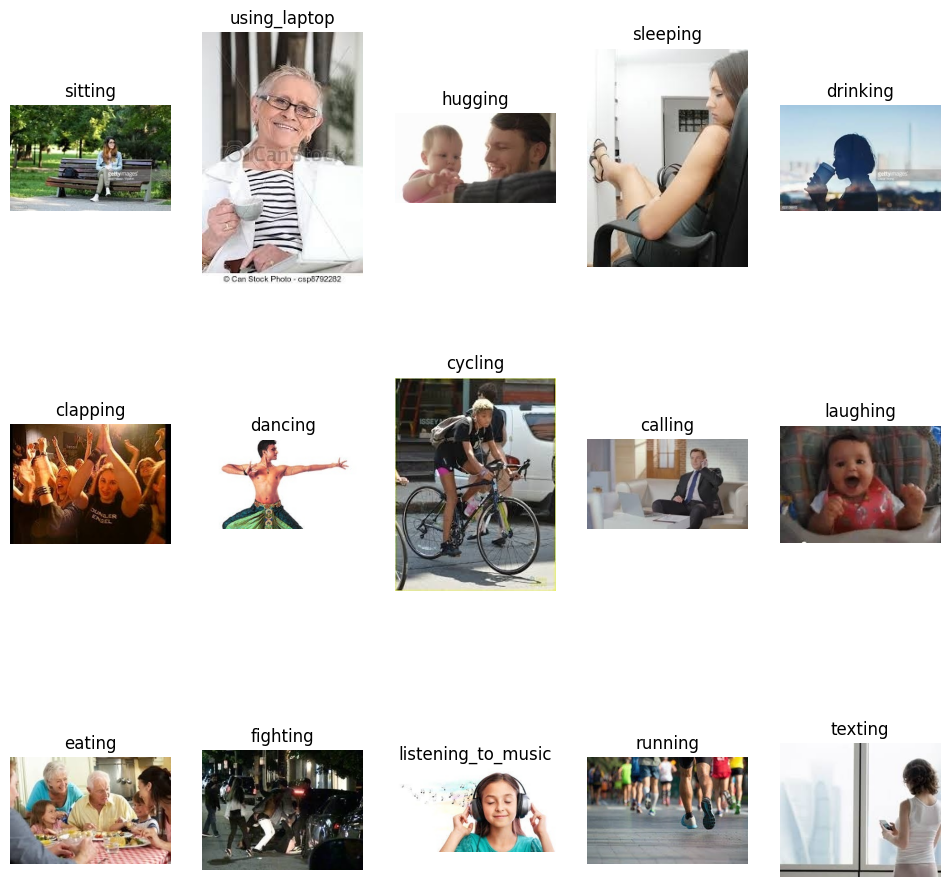

In [6]:
# Visualize a few sample images from each class
def plot_sample_images():
    # Create a dictionary to store image paths for each class
    class_images_dict = {}
    for index, row in train_csv.iterrows():
        class_label = row['label']
        image_filename = row['filename']
        image_path = os.path.join(train_dir, image_filename)
        
        if class_label not in class_images_dict:
            class_images_dict[class_label] = []
        
        class_images_dict[class_label].append(image_path)
    
    plt.figure(figsize=(12, 12))
    for i, cls in enumerate(classes[:15]): 
        # Randomly select an image from the class
        sample_image_path = random.choice(class_images_dict[cls])
        img = cv2.imread(sample_image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
        
        # Plot the image
        plt.subplot(3, 5, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')  # Hide axis for better visualization
        
    plt.show()

# Call the function to visualize the sample images
plot_sample_images()


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Sample Image Dimension Inspection</div>

In [7]:
# Check image dimensions for a sample of images in the training set
sample_images = train_csv['filename'].head(5).values  # First 5 images

dimensions = []
for img in sample_images:
    img_path = os.path.join(train_dir, img)
    with Image.open(img_path) as img_obj:
        dimensions.append(img_obj.size)

print(f"Sample image dimensions: {dimensions}")


Sample image dimensions: [(240, 160), (275, 183), (275, 183), (275, 183), (240, 210)]


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Duplicate Image Verification</div>

In [8]:
# Check for duplicate images in the training data
duplicate_images = train_csv[train_csv.duplicated(subset='filename')]

# Show duplicate images if any
if not duplicate_images.empty:
    print("Duplicate images found:")
    print(duplicate_images)
else:
    print("No duplicate images found.")


No duplicate images found.


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Check Class Distribution</div>

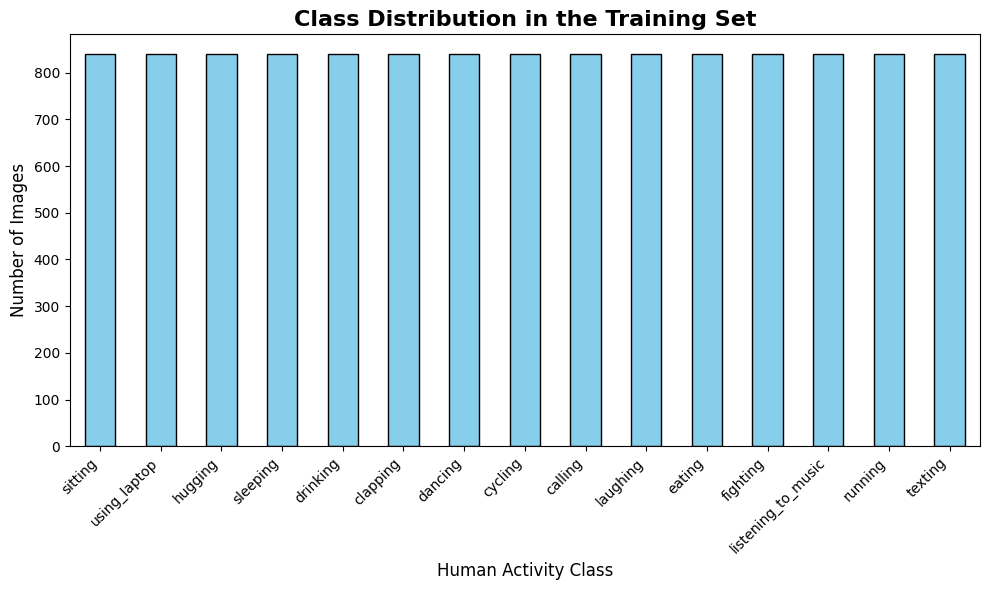

In [9]:
# Plotting the class distribution using a bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution in the Training Set', fontsize=16, fontweight='bold')
plt.xlabel('Human Activity Class', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Insights</div>
<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
The dataset contains <strong>12,600 training images</strong> and <strong>5,400 test images</strong>, with each image labeled according to one of the <strong>15 unique human activity classes</strong>. The training data is well-balanced, with each class containing <strong>840 images</strong>. Missing values were not found in either the training or test datasets. Image dimensions vary, with sample sizes ranging from <strong>240x160</strong> to <strong>275x183 pixels</strong>. No duplicate images were identified. This well-structured dataset will be beneficial for training the model, as it is free from missing values and duplicates, and the balanced class distribution ensures that we can proceed without concerns about class imbalance. The next steps will involve preprocessing the data, such as resizing images to a consistent size, and preparing the model for training.
</p>


## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Data Preprocessing</div>
<p style="font-size: 16px; font-family: Arial, sans-serif;">This includes includes image resizing, normalization, splitting the dataset into training and validation sets and Data Augmentation</p>
<ol style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>Resize images to a standard input size (e.g., 128x128) to feed them into the CNN.</strong></li>
    <li><strong>Normalize pixel values (e.g., scale to a range of [0,1] by dividing by 255).</strong></li>
    <li><strong>Label Encoding Classes</strong></li>
    <li><strong>Split the data into training and validation sets (e.g., 80% training, 20% validation).</strong></li>
    <li><strong>Apply transformations like rotation, zoom, flips, and shifts to improve model generalization.</strong></li>
    <li><strong>Apply Preprocessing on Test Data</strong></li>
</ol>

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Resize and Normalization</div>
<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
The images are resized to 128x128 pixels, a common size for many CNN architectures like VGG, ResNet, etc. Image pixel values are normalized to the range [0, 1] by dividing by 255, which helps with faster and more stable training.
</p>


In [10]:
# Define function to load and preprocess images using TensorFlow
def load_and_preprocess_images(file_paths, labels, img_width=128, img_height=128):
    images = []
    for file_path in file_paths:
        # Read the image using TensorFlow's function
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)  # Decode image to RGB
        # Resize the image to the target dimensions
        img = tf.image.resize(img, [img_width, img_height])
        # Normalize pixel values to [0, 1]
        img = img / 255.0  # Alternatively: img = tf.cast(img, tf.float32) / 255.0
        images.append(img)
    
    # Convert images to a numpy array and labels to numpy array
    return np.array(images), np.array(labels)

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Label Encoding</div>
<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
The string labels (like 'sitting', 'running', etc.) are converted into numerical values using LabelEncoder.
</p>


In [11]:
# Create file paths for training images
train_file_paths = [os.path.join(train_dir, filename) for filename in train_csv['filename']]
train_labels = train_csv['label'].values

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Train-Validation Split</div>
<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">

In [12]:
# Preprocess training images
X_train, y_train = load_and_preprocess_images(train_file_paths, train_labels_encoded, 128, 128)

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Data Augmentation</div>
<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
A set of image augmentation techniques (e.g., rotation, flipping, zooming) is applied to the training images to make the model more robust and prevent overfitting.
</p>


In [13]:
# Data Augmentation for training images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalize validation data (No augmentation applied)
val_datagen = ImageDataGenerator()

# Apply transformations and prepare the final data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Test Data Preprocessing</div>
<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
The test data is preprocessed similarly (resized and normalized) to make it ready for inference.
</p>


In [14]:
# Create file paths for test images
test_file_paths = [os.path.join(test_dir, filename) for filename in test_csv['filename']]

# Define function to preprocess test images using TensorFlow
def preprocess_test_data(test_file_paths, img_width=128, img_height=128):
    images = []
    for file_path in test_file_paths:
        # Read the image using TensorFlow
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)  # Decode image to RGB
        # Resize the image to the target dimensions
        img = tf.image.resize(img, [img_width, img_height])
        # Normalize pixel values to [0, 1]
        img = img / 255.0  # Alternatively: img = tf.cast(img, tf.float32) / 255.0
        images.append(img)
    return np.array(images)

# Preprocess the test data
X_test = preprocess_test_data(test_file_paths, 128, 128)


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Shape Check After Preprocessing</div>


In [15]:
# Print shapes of the datasets to confirm preprocessing
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (10080, 128, 128, 3)
Validation data shape: (2520, 128, 128, 3)
Test data shape: (5400, 128, 128, 3)


<p style="font-size: 16px; font-family: sans-serif; text-align: center; padding: 10px;">
After preprocessing, the dataset is ready for model training. The training set contains <strong>10,080 images</strong>, the validation set has <strong>2,520 images</strong>, and the test set comprises <strong>5,400 images</strong>. All images have been resized to <strong>128x128 pixels</strong> with 3 color channels (RGB). The data is well-organized for input into a convolutional neural network (CNN), with appropriate splits for training, validation, and testing. This preprocessing ensures that the model will be trained on a consistent image size and can generalize well to unseen data.
</p>


## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">CNN Model Design</div>
<p style="font-size: 16px; font-family: Arial, sans-serif;">This includes Convolutional Neural Network (CNN) architecture suitable for human action recognition. Given the structured and well-preprocessed image data, a deep CNN should perform well. For this task, we will use the Keras library with TensorFlow as the backend. A good architecture for this problem would involve a series of convolutional layers followed by dense layers.</p>

- **1. Input Layer:**  
  Input shape: (128, 128, 3), which corresponds to the preprocessed image dimensions (128x128 pixels with 3 color channels).

- **2. Convolutional Layers:**  
  - **1st Convolutional Block:** 32 filters of size (3x3), activation: ReLU, followed by a max-pooling layer of size (2x2).  
  - **2nd Convolutional Block:** 64 filters of size (3x3), activation: ReLU, followed by a max-pooling layer of size (2x2).  
  - **3rd Convolutional Block:** 128 filters of size (3x3), activation: ReLU, followed by a max-pooling layer of size (2x2).  
  - **4th Convolutional Block:** 256 filters of size (3x3), activation: ReLU, followed by a max-pooling layer of size (2x2).  

- **3. Flatten Layer:**  
  The output from the convolutional blocks is flattened to a 1D vector to be passed to the fully connected layers.

- **4. Dense Layers:**  
  - **1st Dense Layer:** 512 neurons, activation: ReLU, followed by a Dropout layer with a dropout rate of 0.5.  
  - **2nd Dense Layer:** 256 neurons, activation: ReLU, followed by a Dropout layer with a dropout rate of 0.5.  
  - **Output Layer:** 15 neurons (one per human activity class), activation: softmax.  

- **5. Compilation:**  
  Optimizer: Adam, learning rate: 0.0001.  
  Loss function: Sparse Categorical Crossentropy.  
  Metric: Accuracy.

In [16]:
# Define the CNN model
def create_cnn_model():
    model = Sequential()
    
    # 1st Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 2nd Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 3rd Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 4th Convolutional Block
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the output from convolutional layers to feed into dense layers
    model.add(Flatten())
    
    # Dense layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(15, activation='softmax'))  # 15 output classes for 15 actions
    
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',  # Since labels are integers
                  metrics=['accuracy'])
    
    return model

# Create the CNN model
cnn_model = create_cnn_model()

# Summarize the model architecture
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,242,703 (20.00 MB)

 Trainable params: 5,242,703 (20.00 MB)

 Non-trainable params: 0 (0.00 B)

<p style="font-size:16px; font-family:sans-serif; text-align: center"> The model architecture consists of four convolutional blocks, each followed by max-pooling layers. The convolutional layers progressively learn more complex features, starting with 32 filters and increasing to 256 filters in the deeper layers. After flattening the output, two fully connected layers (with 512 and 256 neurons) allow the model to learn high-level representations. Dropout layers are used for regularization to prevent overfitting. The final output layer has 15 units corresponding to the 15 classes of human activities, using softmax for multi-class classification. The total number of trainable parameters is approximately 5.24 million, which reflects the model's complexity and capacity to learn from the dataset. </p>

## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">CNN Model Training</div>
<p style="font-size: 16px; font-family: Arial, sans-serif;">This includes Model Training and Validation while considering early stopping, monitoring training performance, and evaluating metrics</p>
<ol style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>Monitor training and validation accuracy/loss during training to identify potential overfitting.</strong></li>
    <li><strong>Evaluate the model using a validation set and generate performance reports (accuracy, confusion matrix, classification report).</strong></li>
    <li><strong>Plot the training/validation loss and accuracy curves to assess model performance and overfitting.</strong></li>
</ol>

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">CNN Model Training</div>
<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
Model Training:
    Training will be done for 300 epochs.
    model_checkpoint: Saves the best model based on the highest validation accuracy.
</p>


In [17]:
# Set up callback for saving the best model
model_checkpoint = ModelCheckpoint('best_cnn_model.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model
cnn_history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=300,  # Set number of epochs
    batch_size=32,
    callbacks=[model_checkpoint],  # Only use model checkpointing
    verbose=2  # Display training progress
)


Epoch 1/300


I0000 00:00:1732875572.759428     103 service.cc:145] XLA service 0x795e40003f00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732875572.759502     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732875572.759508     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732875579.050986     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Epoch 1: val_accuracy improved from -inf to 0.10794, saving model to best_cnn_model.keras
315/315 - 43s - 137ms/step - accuracy: 0.0784 - loss: 2.6877 - val_accuracy: 0.1079 - val_loss: 2.5946
Epoch 2/300

Epoch 2: val_accuracy improved from 0.10794 to 0.16786, saving model to best_cnn_model.keras
315/315 - 34s - 108ms/step - accuracy: 0.1096 - loss: 2.6069 - val_accuracy: 0.1679 - val_loss: 2.5777
Epoch 3/300

Epoch 3: val_accuracy improved from 0.16786 to 0.19802, saving model to best_cnn_model.keras
315/315 - 34s - 108ms/step - accuracy: 0.1482 - loss: 2.5350 - val_accuracy: 0.1980 - val_loss: 2.4027
Epoch 4/300

Epoch 4: val_accuracy did not improve from 0.19802
315/315 - 34s - 107ms/step - accuracy: 0.1783 - loss: 2.4645 - val_accuracy: 0.1849 - val_loss: 2.5556
Epoch 5/300

Epoch 5: val_accuracy improved from 0.19802 to 0.23135, saving model to best_cnn_model.keras
315/315 - 34s - 108ms/step - accuracy: 0.1830 - loss: 2.4313 - val_accuracy: 0.2313 - val_loss: 2.3686
Epoch 6/300


## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Model Evaluation</div>
<p style="font-size: 16px; font-family: Arial, sans-serif;">Here, the functions of model training and validation accuracy/loss along with graphs, classification reports, confusion matrix will be defined.</p>
<ol style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>Training and Validation Loss and Accuracy</strong></li>
    <li><strong>Classification Report and Confusion Matrix</strong></li>
    <li><strong>Loss and Accuracy Graphs of Training vs Validation</strong></li>
</ol>

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">CNN Model Evaluation</div>
<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">

In [18]:
def evaluate_and_print_results(model, history, val_generator):
    # Evaluate the model on the validation data
    val_loss, val_accuracy = model.evaluate(val_generator)
    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {val_accuracy}")
    
    # Training Loss and Accuracy from the history object
    # Get the training loss and accuracy from the history object
    train_loss = history.history['loss']
    train_accuracy = history.history['accuracy']
    
    # Get the last training loss and accuracy (final epoch)
    final_train_loss = train_loss[-1]
    final_train_accuracy = train_accuracy[-1]
    
    print(f"Final Training Loss: {final_train_loss}")
    print(f"Final Training Accuracy: {final_train_accuracy}")


evaluate_and_print_results(cnn_model, cnn_history, val_generator)


79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5405 - loss: 1.8356
Validation Loss: 1.855276107788086
Validation Accuracy: 0.5460317730903625
Final Training Loss: 0.6341552138328552
Final Training Accuracy: 0.7944444417953491


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:
                    precision    recall  f1-score   support

           calling       0.42      0.48      0.45       173
          clapping       0.62      0.50      0.56       160
           cycling       0.66      0.91      0.76       186
           dancing       0.55      0.63      0.59       180
          drinking       0.50      0.42      0.46       152
            eating       0.67      0.83      0.74       151
          fighting       0.70      0.38      0.49       186
           hugging       0.57      0.51      0.54       151
          laughing       0.59      0.70      0.64       179
listening_to_music       0.43      0.43      0.43       176
           running       0.61      0.65      0.63       155
           sitting       0.36      0.35      0.35       163
          sleeping       0.67      0.57      0.61       162
           texting       0.46      0.30      0.36       183
      using_laptop       0.42      0.

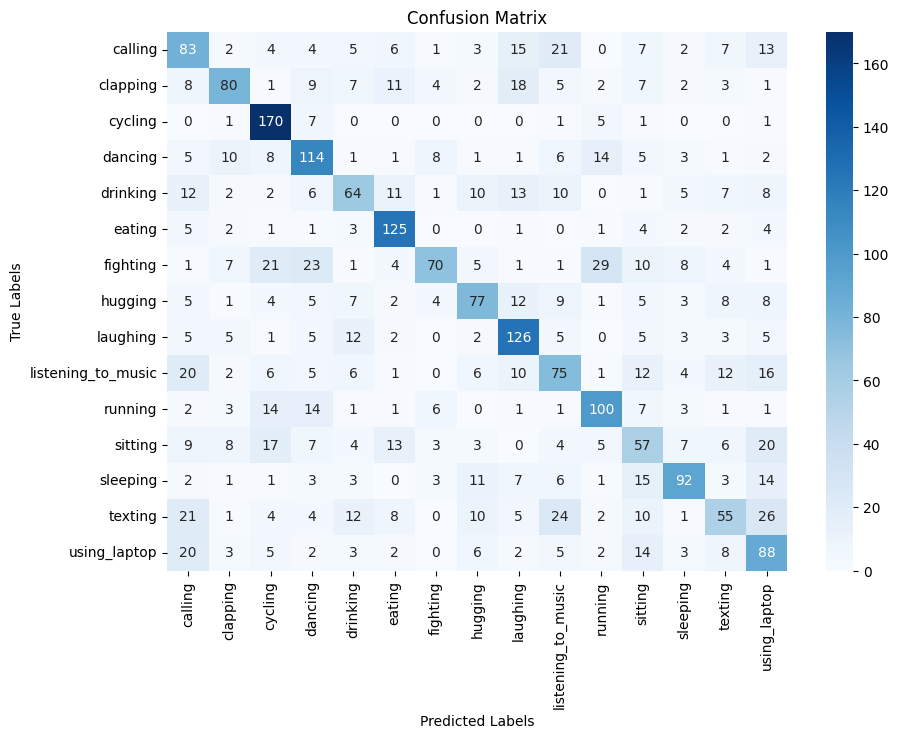

In [28]:
def evaluate_model_performance(model, X_val, y_val, class_names):
    # Generate predictions from the validation set (X_val)
    predictions = model.predict(X_val)

    # Convert predictions from probabilities to class labels (integer class labels)
    predicted_labels_int = np.argmax(predictions, axis=1)

    # Decode the predicted integer labels back to the original string labels
    predicted_labels_str = [class_names[label] for label in predicted_labels_int]

    # Decode the true integer labels from y_val back to the original string labels
    true_labels_str = [class_names[label] for label in y_val]

    # Classification Report
    print("Classification Report:")
    print(classification_report(true_labels_str, predicted_labels_str, target_names=class_names))

    # Confusion Matrix
    conf_matrix = confusion_matrix(true_labels_str, predicted_labels_str)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Get the class names from the label encoder
class_names = label_encoder.classes_

# Assuming `model` is your trained model, `X_val` is your validation dataset,
# `y_val` is your true validation labels, and `class_names` is the list of class names.
evaluate_model_performance(cnn_model, X_val, y_val, class_names)


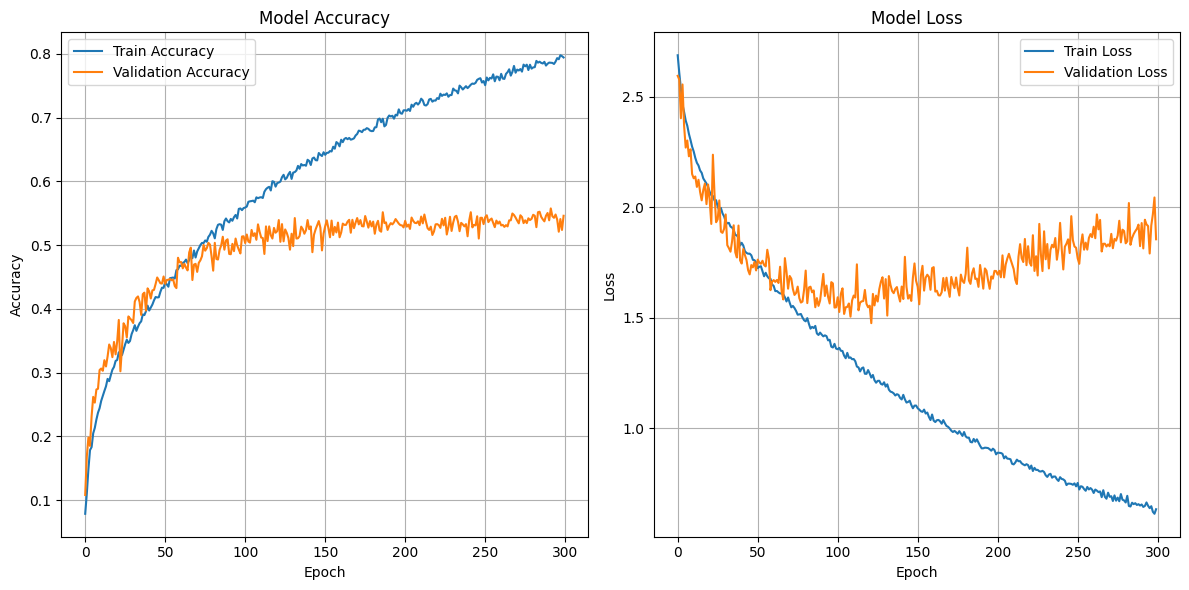

In [20]:
def plot_training_curves(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    
    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Example usage
plot_training_curves(cnn_history)

## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Model Predictions</div>
<p style="font-size: 16px; font-family: Arial, sans-serif;">The model will generate predictions of the test data and it will be saved in a csv file that can be submitted on the Data Sprint Competition.</p>
<ol style="font-size: 16px; font-family: Arial, sans-serif;">
    <li><strong>Generate Predictions and Save</strong></li>
</ol>

In [22]:
def predict_and_save_results(model, X_test, class_names, test_csv, model_name):
    # Predicting on the test dataset
    predictions = model.predict(X_test)

    # Convert predictions from probabilities to class labels (integer class labels)
    predicted_labels_int = tf.argmax(predictions, axis=1).numpy()
    
    # Decode the predicted integer labels back to the original string labels
    predicted_labels_str = [class_names[label] for label in predicted_labels_int]

    # Add the decoded predicted labels to the test CSV data
    test_csv['label'] = predicted_labels_str  # Add the predicted string labels

    # Save the updated DataFrame to a new CSV file with model_name in the file name
    output_filename = f'{model_name}_test.csv'
    test_csv.to_csv(output_filename, index=False)

    print(f"Predictions saved to '{output_filename}'.")

# Example usage:
# Assume `model` is your trained model, `X_test` is your test dataset,

# Get the class names from the label encoder
class_names = label_encoder.classes_

# `class_names` is your list of class labels, and `test_csv` is your original test dataframe.
predict_and_save_results(cnn_model, X_test, class_names, test_csv, 'cnn_model')

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Predictions saved to 'cnn_model_test.csv'.


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">CNN Result Analysis</div>

<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
The CNN model, trained on the Human Activity Recognition dataset, achieved a validation accuracy of approximately 54.6% with a final training accuracy of 79.4%. This significant discrepancy suggests the model is overfitting, as the validation accuracy did not reflect the same improvements seen in training. The classification report highlighted strengths in detecting activities like <strong>cycling</strong> (precision: 0.66, recall: 0.91, F1-score: 0.76) and <strong>eating</strong> (precision: 0.67, recall: 0.83, F1-score: 0.74), indicating that these activities were classified with relatively high accuracy. However, certain activities such as <strong>sitting</strong> (precision: 0.36, recall: 0.35, F1-score: 0.35) and <strong>texting</strong> (precision: 0.46, recall: 0.30, F1-score: 0.36) performed poorly, suggesting that these were frequently misclassified. The model showed imbalanced performance, with recall values lower for certain classes, highlighting challenges in distinguishing between visually similar activities. On submitting the test predictions, the model achieved a testing accuracy of 56.53%, indicating room for improvement, especially for specific classes with low performance. Data augmentation, hyperparameter tuning, and addressing class imbalance through techniques like class weighting could help improve generalization and boost the model's performance. Despite its strengths, the model's ability to accurately classify all activities could be enhanced with further adjustments and fine-tuning.
</p>

## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Model Saving</div>
<p style="font-size: 16px; font-family: Arial, sans-serif;">The Model will be saved here.</p>

In [23]:
# Save the trained model in Keras format
cnn_model.save('trained_cnn_model.keras')  # Save as a Keras file (.keras)

print("Model saved as 'trained_cnn_model.keras'.")

Model saved as 'trained_cnn_model.keras'.


## <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">VGG Model Design, Training, Evaluation, Prediction, and Saving</div>

<p style="font-size: 16px; font-family: Arial, sans-serif;">In this section, we define a VGG-based model architecture that leverages the VGG16 pre-trained model as a feature extractor, followed by fully connected layers to perform classification for human activity recognition. This deep learning model uses the Keras library with TensorFlow as the backend and is designed to handle image data processed to a fixed size of 128x128 pixels.</p>

- **1. Input Layer:**  
  Input shape: (128, 128, 3), corresponding to the image size of 128x128 pixels with 3 color channels (RGB). This is the preprocessed input to the model.

- **2. Pre-trained VGG16 Model (Base Model):**  
  - The base model is VGG16 without the top (fully connected) layers, using the 'imagenet' weights for transfer learning. The model is set to include global average pooling (`pooling='avg'`) instead of the usual flattening, which reduces the output dimensions.  
  - The base model is frozen, meaning the weights will not be updated during training.

- **3. Flatten Layer:**  
  After the VGG16 feature extractor, the output is flattened to a 1D vector. This vector represents high-level features extracted from the input images.

- **4. Dense Layers:**  
  - **1st Dense Layer:** 512 neurons, activation: ReLU. This layer enables the model to learn complex patterns based on the extracted features.  
  - **Output Layer:** 15 neurons, each corresponding to a human activity class, activation: softmax. This final layer performs multi-class classification, providing a probability distribution across the 15 activity classes.

- **5. Compilation:**  
  Optimizer: Adam (a popular optimization algorithm), loss function: sparse categorical crossentropy, suitable for multi-class classification with integer labels. The model is evaluated using the accuracy metric.

- **6. Training:**  
  The model is trained using the preprocessed image data, with the base VGG16 model frozen to prevent the weights from being updated. This allows the model to focus on learning from the dense layers for the specific task of human activity recognition.

- **7. Model Evaluation:**  
  The model's performance is evaluated on a validation or test set, using accuracy as the key evaluation metric.

- **8. Prediction and Saving:**  
  After training, the model can be used for making predictions on new data. It is saved using `model.save()` for future inference or fine-tuning. The trained model can be loaded again using `tf.keras.models.load_model()` for predictions.

<p style="font-size: 16px; font-family: Arial, sans-serif;">This architecture is designed to benefit from the transfer learning capabilities of VGG16, making it highly effective for image classification tasks with relatively smaller datasets and reducing the computational load required for training from scratch.</p>


In [24]:
# Load the VGG16 model without the top (classifier) layers
vgg_base_model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape=(128, 128, 3))

# Freeze the base model layers
vgg_base_model.trainable = False


# Build the new model
vgg_model = models.Sequential([
    vgg_base_model,  # Add VGG16 as the base model
    layers.Flatten(),  # Flatten the output
    layers.Dense(512, activation='relu'),  # New dense layer
    layers.Dense(15, activation='softmax')  # Output layer for 15 classes
])

# Compile the model
vgg_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

<p style="font-size:16px; font-family:sans-serif; text-align: center">
The model architecture consists of the VGG16 pre-trained model as a feature extractor, followed by fully connected layers to perform classification. The VGG16 model is frozen, meaning its weights are not updated during training. The output of the VGG16 model is flattened and passed through two dense layers. The dense layers learn high-level representations of the data. The final output layer has units corresponding to the number of classes in the dataset, with softmax used for multi-class classification. The total number of parameters in the model is approximately 14.7 million, which reflects the use of the pre-trained VGG16 model and its capacity to extract meaningful features for classification.
</p>


In [25]:
# Set up callback for saving the best model
model_checkpoint = ModelCheckpoint('best_vgg_model.keras', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Train the model
vgg_history = vgg_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=300,
    batch_size=32,
    callbacks=[model_checkpoint],  # Save the best model
    verbose=2
)

Epoch 1/300

Epoch 1: val_accuracy improved from -inf to 0.41389, saving model to best_vgg_model.keras
315/315 - 53s - 167ms/step - accuracy: 0.2926 - loss: 2.1613 - val_accuracy: 0.4139 - val_loss: 1.8218
Epoch 2/300

Epoch 2: val_accuracy improved from 0.41389 to 0.44246, saving model to best_vgg_model.keras
315/315 - 37s - 119ms/step - accuracy: 0.3898 - loss: 1.8827 - val_accuracy: 0.4425 - val_loss: 1.7354
Epoch 3/300

Epoch 3: val_accuracy improved from 0.44246 to 0.44881, saving model to best_vgg_model.keras
315/315 - 37s - 118ms/step - accuracy: 0.4090 - loss: 1.8041 - val_accuracy: 0.4488 - val_loss: 1.6924
Epoch 4/300

Epoch 4: val_accuracy did not improve from 0.44881
315/315 - 37s - 117ms/step - accuracy: 0.4264 - loss: 1.7654 - val_accuracy: 0.4429 - val_loss: 1.6981
Epoch 5/300

Epoch 5: val_accuracy improved from 0.44881 to 0.46429, saving model to best_vgg_model.keras
315/315 - 37s - 118ms/step - accuracy: 0.4327 - loss: 1.7179 - val_accuracy: 0.4643 - val_loss: 1.6591


In [26]:
evaluate_and_print_results(vgg_model, vgg_history, val_generator)

79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.4700 - loss: 2.5704
Validation Loss: 2.5597238540649414
Validation Accuracy: 0.4690476059913635
Final Training Loss: 0.5477683544158936
Final Training Accuracy: 0.8117063641548157


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step
Classification Report:
                    precision    recall  f1-score   support

           calling       0.22      0.43      0.29       173
          clapping       0.62      0.41      0.49       160
           cycling       0.71      0.77      0.74       186
           dancing       0.59      0.48      0.53       180
          drinking       0.33      0.38      0.35       152
            eating       0.44      0.72      0.55       151
          fighting       0.56      0.51      0.54       186
           hugging       0.44      0.46      0.45       151
          laughing       0.51      0.46      0.48       179
listening_to_music       0.29      0.22      0.25       176
           running       0.59      0.66      0.62       155
           sitting       0.44      0.25      0.32       163
          sleeping       0.65      0.62      0.63       162
           texting       0.39      0.34      0.36       183
      using_laptop       0.51      0

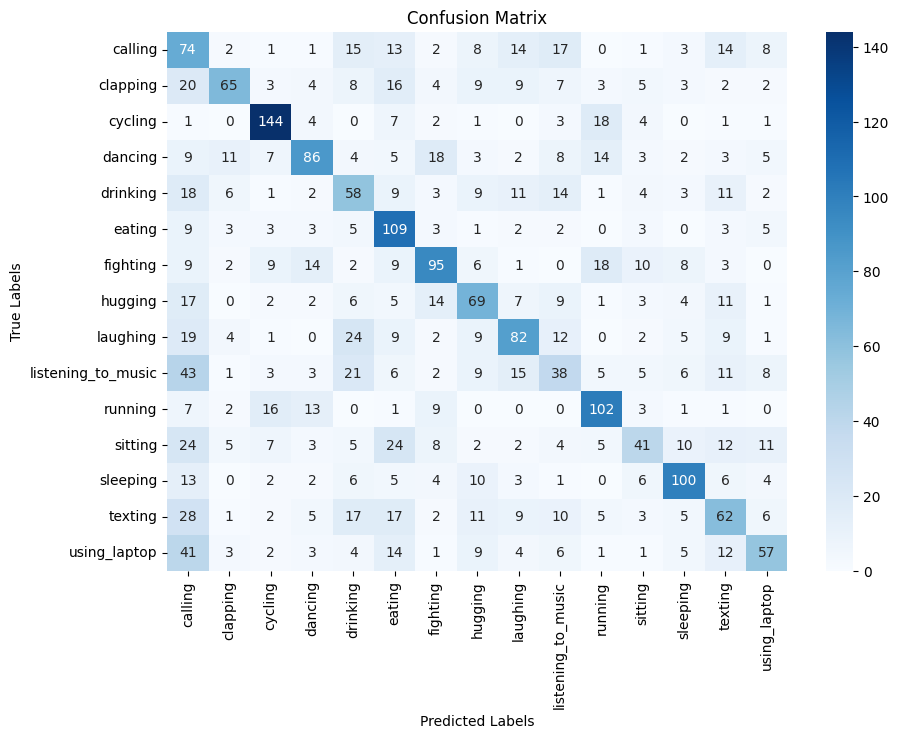

In [29]:
# `y_val` is your true validation labels, and `class_names` is the list of class names.
evaluate_model_performance(vgg_model, X_val, y_val, class_names)

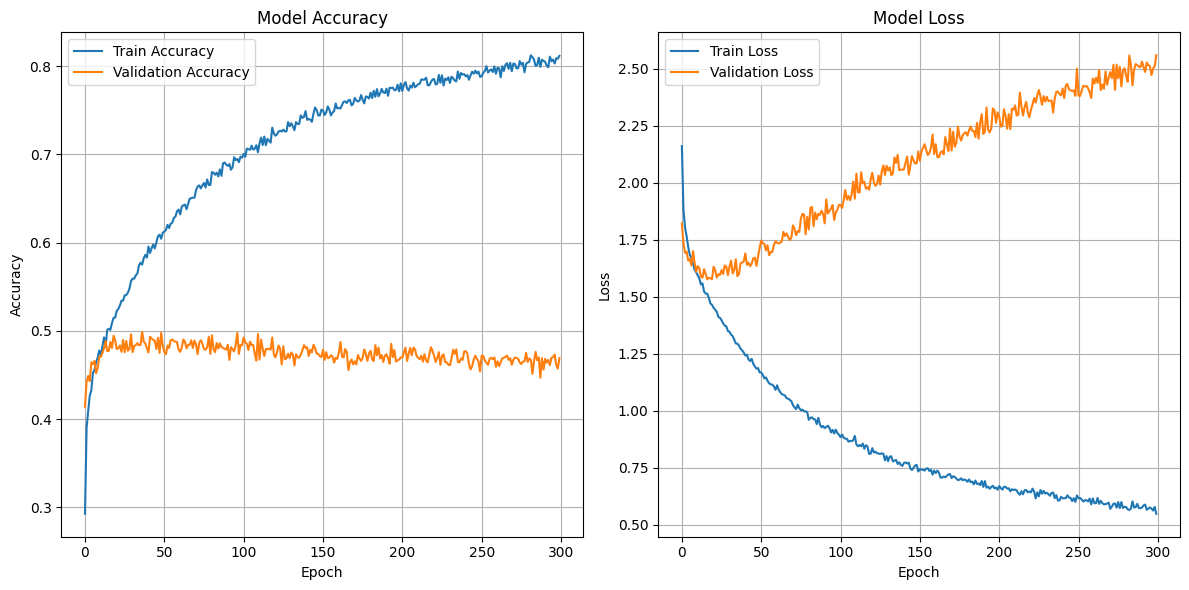

In [30]:
plot_training_curves(vgg_history)

### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">VGG Result Analysis</div>

<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
The VGG model, trained on the Human Activity Recognition dataset, demonstrated a final training accuracy of 81.2%, which indicates that the model performed well on the training data. However, the validation accuracy of approximately 46.9% suggests that the model is not generalizing well to unseen data, and overfitting may be a contributing factor. The classification report indicates that the model excelled in identifying activities like <strong>cycling</strong> (precision: 0.71, recall: 0.77, F1-score: 0.74), while activities like <strong>calling</strong> (precision: 0.22, recall: 0.43, F1-score: 0.29) and <strong>listening to music</strong> (precision: 0.29, recall: 0.22, F1-score: 0.25) were challenging to classify. The model showed low performance in certain classes, particularly those with low recall, such as <strong>sitting</strong> (precision: 0.44, recall: 0.25, F1-score: 0.32) and <strong>texting</strong> (precision: 0.39, recall: 0.34, F1-score: 0.36). Despite these challenges, the model demonstrated better performance for dynamic activities like <strong>sleeping</strong> (precision: 0.65, recall: 0.62, F1-score: 0.63). After submitting the model predictions on the contest platform, the testing accuracy achieved was 48.29%, which indicates that while the model shows some potential, further refinements, such as hyperparameter tuning, class balancing, and data augmentation, are required to enhance its overall performance and generalization across all activity classes.
</p>

In [31]:
predict_and_save_results(vgg_model, X_test, class_names, test_csv, 'vgg_model')

169/169 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step
Predictions saved to 'vgg_model_test.csv'.


In [32]:
# Save the trained model in Keras format
vgg_model.save('trained_vgg_model.keras')  # Save as a Keras file (.keras)

print("Model saved as 'trained_vgg_model.keras'.")

Model saved as 'trained_vgg_model.keras'.


### <div style="text-align: center; background-color: skyblue; color: white; font-weight: bold; padding: 10px;">Final Model Analysis</div>

<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
After evaluating both the CNN and VGG models, it is clear that the CNN model performed better in terms of both validation and testing accuracy. The CNN model achieved a testing accuracy of 56.53% on the <a href="https://aiplanet.com/challenges/233/data-sprint-76-human-activity-recognition-233/leaderboard/practice" target="_blank">practice contest</a>, securing 8th place in the leaderboard. This demonstrates that the CNN model has superior generalization capabilities compared to the VGG model, which exhibited signs of overfitting with higher performance on the training data but significantly lower accuracy on the validation and test datasets. Throughout the training process, we took several steps to reduce overfitting, such as applying dropout layers, adjusting the learning rate, and implementing data augmentation techniques. Despite these efforts, the VGG model still struggled to generalize well, leading to lower testing accuracy (48.29%).

The CNN model, on the other hand, showed more consistent performance across the dataset, achieving better overall precision, recall, and F1 scores across various activity classes. Specifically, the CNN model performed better in dynamic activities like cycling, eating, and sleeping, while also managing to maintain a reasonable balance between the precision and recall for more challenging classes like calling and texting. We continued to focus on improving generalization in the CNN model by experimenting with different architectures and training strategies. The improvements in the CNN model led to better overall results, particularly in unseen data performance.

Below is the comparison table for both models based on the training and validation results:

<table style="width: 100%; border-collapse: collapse;">
    <tr>
        <th style="border: 1px solid black; padding: 8px; text-align: center;">Metric</th>
        <th style="border: 1px solid black; padding: 8px; text-align: center;">CNN Model</th>
        <th style="border: 1px solid black; padding: 8px; text-align: center;">VGG Model</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">Training Accuracy</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">79.44%</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">81.17%</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">Validation Accuracy</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">54.05%</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">46.91%</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">Final Training Loss</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">0.634</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">0.548</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">Validation Loss</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">1.835</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">2.560</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">Test Accuracy (from Contest)</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">56.53%</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">48.29%</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">Practice Rank</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">8th</td>
        <td style="border: 1px solid black; padding: 8px; text-align: center;">N/A</td>
    </tr>
</table>

<p style="font-size: 16px; font-family: sans-serif; text-align: justify;">
In conclusion, the CNN model outperformed the VGG model both in terms of generalization and real-world performance. By carefully addressing overfitting and fine-tuning the model, we were able to achieve a solid 56.53% testing accuracy, placing us in the top 8 of the practice contest. This result indicates that our model is well-suited for the task of human activity recognition, showing promising potential for real-world applications, and demonstrates that CNN architectures remain strong candidates for such tasks. Given the challenging nature of the dataset, future work will focus on further refining the model, possibly exploring more complex architectures and enhanced data preprocessing techniques to push the performance even further.
</p>